In [164]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [8]:
tf.config.list_physical_devices("GPU")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
resnet = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 435s 4us/step


In [7]:
# Save the model in TensorFlow's SavedModel format (directory-based)
resnet.save('resnet50_model.h5')


In [13]:
resnet.save('resnet50.keras')

In [4]:
resnet50 = load_model("resnet50.keras")

I0000 00:00:1728216713.663675    1299 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728216713.752358    1299 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728216713.752398    1299 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728216713.755065    1299 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728216713.755098    1299 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [10]:
resnet50.layers

[<InputLayer name=input_layer_2, built=True>,
 <ZeroPadding2D name=conv1_pad, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>,
 <ZeroPadding2D name=pool1_pad, built=True>,
 <MaxPooling2D name=pool1_pool, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <BatchNormalization name=conv2_block1_2_bn, built=True>,
 <Activation name=conv2_block1_2_relu, built=True>,
 <Conv2D name=conv2_block1_0_conv, built=True>,
 <Conv2D name=conv2_block1_3_conv, built=True>,
 <BatchNormalization name=conv2_block1_0_bn, built=True>,
 <BatchNormalization name=conv2_block1_3_bn, built=True>,
 <Add name=conv2_block1_add, built=True>,
 <Activation name=conv2_block1_out, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <BatchNormalization 

In [13]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:
for i,layer in enumerate(resnet50.layers):
    print(i,"   ",layer.name)

0     input_layer_2
1     conv1_pad
2     conv1_conv
3     conv1_bn
4     conv1_relu
5     pool1_pad
6     pool1_pool
7     conv2_block1_1_conv
8     conv2_block1_1_bn
9     conv2_block1_1_relu
10     conv2_block1_2_conv
11     conv2_block1_2_bn
12     conv2_block1_2_relu
13     conv2_block1_0_conv
14     conv2_block1_3_conv
15     conv2_block1_0_bn
16     conv2_block1_3_bn
17     conv2_block1_add
18     conv2_block1_out
19     conv2_block2_1_conv
20     conv2_block2_1_bn
21     conv2_block2_1_relu
22     conv2_block2_2_conv
23     conv2_block2_2_bn
24     conv2_block2_2_relu
25     conv2_block2_3_conv
26     conv2_block2_3_bn
27     conv2_block2_add
28     conv2_block2_out
29     conv2_block3_1_conv
30     conv2_block3_1_bn
31     conv2_block3_1_relu
32     conv2_block3_2_conv
33     conv2_block3_2_bn
34     conv2_block3_2_relu
35     conv2_block3_3_conv
36     conv2_block3_3_bn
37     conv2_block3_add
38     conv2_block3_out
39     conv3_block1_1_conv
40     conv3_block1_1_bn
41     

In [20]:
for i, layer in enumerate(resnet50.layers):
    print(f"Layer {i} - {layer.name}")
    print(f"Config: {layer.get_config()}")
    print()


Layer 0 - input_layer_2
Config: {'batch_shape': (None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_2'}

Layer 1 - conv1_pad
Config: {'name': 'conv1_pad', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'padding': ((3, 3), (3, 3)), 'data_format': 'channels_last'}

Layer 2 - conv1_conv
Config: {'name': 'conv1_conv', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': (7, 7), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': 

In [21]:
for i, layer in enumerate(resnet50.layers):
    weights = layer.get_weights()
    print(f"Layer {i} - {layer.name} has {len(weights)} weight arrays.")
    for w in weights:
        print(f"  Shape: {w.shape}")
    print()


Layer 0 - input_layer_2 has 0 weight arrays.

Layer 1 - conv1_pad has 0 weight arrays.

Layer 2 - conv1_conv has 2 weight arrays.
  Shape: (7, 7, 3, 64)
  Shape: (64,)

Layer 3 - conv1_bn has 4 weight arrays.
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)

Layer 4 - conv1_relu has 0 weight arrays.

Layer 5 - pool1_pad has 0 weight arrays.

Layer 6 - pool1_pool has 0 weight arrays.

Layer 7 - conv2_block1_1_conv has 2 weight arrays.
  Shape: (1, 1, 64, 64)
  Shape: (64,)

Layer 8 - conv2_block1_1_bn has 4 weight arrays.
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)

Layer 9 - conv2_block1_1_relu has 0 weight arrays.

Layer 10 - conv2_block1_2_conv has 2 weight arrays.
  Shape: (3, 3, 64, 64)
  Shape: (64,)

Layer 11 - conv2_block1_2_bn has 4 weight arrays.
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)
  Shape: (64,)

Layer 12 - conv2_block1_2_relu has 0 weight arrays.

Layer 13 - conv2_block1_0_conv has 2 weight arrays.
  Shape: (1, 1, 64, 256)
  Shape: (256,)


In [ ]:
image_shapes = np.array([])

'/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images'

In [2]:
import scipy.io
import os

mat_data = scipy.io.loadmat(os.getcwd()+"/SynthText/gt.mat")

# Display the keys in the loaded dictionary
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'charBB', 'wordBB', 'imnames', 'txt'])


In [3]:
charbb = mat_data["charBB"][0]
wordbb = mat_data["wordBB"][0]
imnames = mat_data["imnames"][0]
txt = mat_data["txt"][0]

In [108]:
def get_tco(x,y):
    return np.array([np.mean([x[0],x[3]]),np.mean([y[0],y[3]]),np.mean([x[1],x[2]]),np.mean([y[1],y[2]])])

In [109]:
def get_tbo(x,y):
    return [x,y]

In [110]:
def get_tcl_points_char(x,y):
    return np.array([np.mean([x[0],x[3]]),np.mean([y[0],y[3]]),np.mean([x[1],x[2]]),np.mean([y[1],y[2]])])

In [189]:
def get_tcl_map(image_shape,image_number):
    tcl_map = np.zeros((image_shape[0],image_shape[1],1))
    words = wordbb[image_number]
    for i in range(words.shape[2]):
        x_coords = words[0, :, i].astype('int') 
        y_coords = words[1, :, i].astype('int') 
        tcl_points = get_tcl_points_char(x_coords,y_coords).astype('int')
        cv2.line(tcl_map, (tcl_points[0], tcl_points[1]), (tcl_points[2], tcl_points[3]), (255-(i)), 3)
    plt.imshow(tcl_map ,cmap='gray')
    plt.axis('off')
    plt.show()
    return tcl_map

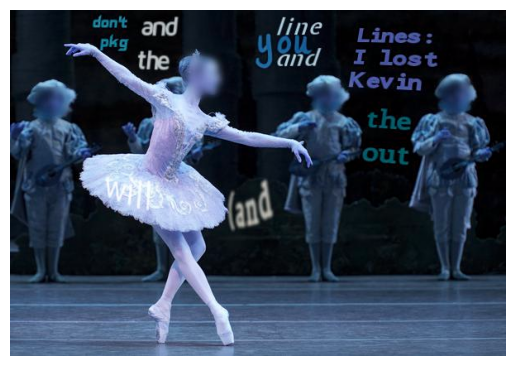

In [190]:
image = cv2.imread(os.getcwd()+"/SynthText/"+imnames[0][0])
plt.imshow(image)
plt.axis('off')
plt.show()

In [203]:
def get_tco_map(tcl_map,image_shape,image_number):
    
    tco_map = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    word_coordinates = wordbb[image_number]

    print("TCL MAP SHAPE:",tcl_map.shape)
    print("TCO MAP SHAPE:",tco_map.shape)

    for i in range(word_coordinates.shape[2]):

        x_coords = word_coordinates[0, :, i].astype('int')
        y_coords = word_coordinates[1, :, i].astype('int')

        word_center = np.array([np.mean(x_coords).astype('int'),np.mean(y_coords).astype('int')])
        # cv2.polylines(tco_map, [np.array([word_center], np.int32)], isClosed=True, color= 0, thickness=8)
        print("CENTER OF WORD: ",i, " is ", word_center," Where x is: ",x_coords," And Y is: ", y_coords)

        for j in range(x_coords[0],x_coords[1]):
            for z in range(y_coords[0],y_coords[2]):
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tco_map[z,j] == 255:
                    # tco_map[z,j] = np.linalg.norm( np.array([z,j])  - word_center) 
                    tco_map[z,j] = distance.euclidean([j, z], [word_center[0], word_center[1]]) * 3

    return tco_map
        

In [219]:
def get_tbo_map(tcl_map,image_shape,image_number):

    tbo_map1 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tbo_map2 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tbo_map3 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tbo_map4 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)

    word_coordinates = wordbb[image_number]

    for i in range(word_coordinates.shape[2]):

        x_coords = word_coordinates[0, :, i].astype('int')
        y_coords = word_coordinates[1, :, i].astype('int')

        for j in range(x_coords[0],x_coords[1]):
            for z in range(y_coords[0],y_coords[2]):
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tbo_map1[z,j] == 255:
                    tbo_map1[z,j] = np.abs(j - x_coords[0])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tbo_map2[z,j] == 255:
                    tbo_map2[z,j] = np.abs(z - y_coords[0])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tbo_map3[z,j] == 255:
                    tbo_map3[z,j] = np.abs(j - x_coords[1])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tbo_map4[z,j] == 255:
                    tbo_map4[z,j] = np.abs(z - y_coords[2])

    plt.figure(figsize=(10, 10))

    # Show each image in a subplot
    # plt.subplot(2, 2, 1)
    # plt.imshow(tbo_map1,cmap='gray')
    # plt.title('Image 1')
    # plt.axis('off')  # Turn off the axis labels

    # plt.subplot(2, 2, 2)
    # plt.imshow(tbo_map2,cmap='gray')
    # plt.title('Image 2')
    # plt.axis('off')

    # plt.subplot(2, 2, 3)
    # plt.imshow(tbo_map3,cmap='gray')
    # plt.title('Image 3')
    # plt.axis('off')

    # plt.subplot(2, 2, 4)
    # plt.imshow(tbo_map4,cmap='gray')
    # plt.title('Image 4')
    # plt.axis('off')
    # plt.show()
    return np.array([tbo_map1,tbo_map2,tbo_map3,tbo_map4])
    

In [ ]:
def get_tvo_map(tcl_map,image_shape,image_number):

    tvo_map1 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tvo_map2 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tvo_map3 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)
    tvo_map4 = np.full((image_shape[0],image_shape[1],1), 255, dtype=np.uint8)

    word_coordinates = wordbb[image_number]
    
    for i in range(word_coordinates.shape[2]):

        x_coords = word_coordinates[0, :, i].astype('int')
        y_coords = word_coordinates[1, :, i].astype('int')

        for j in range(x_coords[0],x_coords[1]):
            for z in range(y_coords[0],y_coords[2]):
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tvo_map1[z,j] == 255:
                    tvo_map1[z,j] = np.abs(j - x_coords[0])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tvo_map2[z,j] == 255:
                    tvo_map2[z,j] = np.abs(z - y_coords[0])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tvo_map3[z,j] == 255:
                    tvo_map3[z,j] = np.abs(j - x_coords[1])
                if tcl_map[z,j] != 0 and tcl_map[z,j] == (255-i) and tvo_map4[z,j] == 255:
                    tvo_map4[z,j] = np.abs(z - y_coords[2])

In [217]:
def get_image_maps(image_number):
    image = cv2.imread(os.getcwd()+"/SynthText/"+imnames[image_number][0])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    tcl_map = get_tcl_map(image.shape,image_number)
    tco_map = get_tco_map(tcl_map,image.shape,image_number)
    tbo_map = get_tbo_map(tcl_map,image.shape,image_number)
    tvo_map = get_tvo_map(tcl_map,image.shape,image_number)
    return [tcl_map,tco_map,tbo_map]

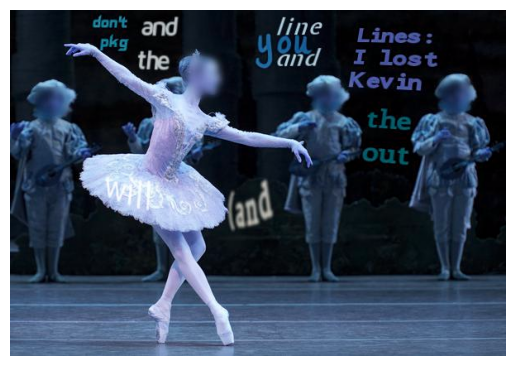

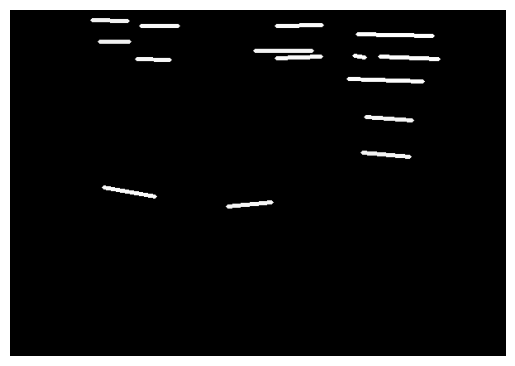

TCL MAP SHAPE: (419, 600, 1)
TCO MAP SHAPE: (419, 600, 1)
CENTER OF WORD:  0  is  [465  31]  Where x is:  [420 512 511 420]  And Y is:  [21 23 41 39]
CENTER OF WORD:  1  is  [423  57]  Where x is:  [418 431 428 415]  And Y is:  [46 48 68 66]
CENTER OF WORD:  2  is  [483  58]  Where x is:  [448 519 518 447]  And Y is:  [47 50 70 67]
CENTER OF WORD:  3  is  [454  85]  Where x is:  [410 499 499 409]  And Y is:  [73 77 98 95]
CENTER OF WORD:  4  is  [144 220]  Where x is:  [117 179 172 110]  And Y is:  [197 208 245 233]
CENTER OF WORD:  5  is  [349  19]  Where x is:  [322 377 378 322]  And Y is:  [ 9  8 30 31]
CENTER OF WORD:  6  is  [349  58]  Where x is:  [322 376 377 323]  And Y is:  [48 46 68 70]
CENTER OF WORD:  7  is  [180  20]  Where x is:  [159 203 203 158]  And Y is:  [ 9  9 32 31]
CENTER OF WORD:  8  is  [173  61]  Where x is:  [154 193 193 153]  And Y is:  [49 50 73 72]
CENTER OF WORD:  9  is  [289 236]  Where x is:  [260 313 319 266]  And Y is:  [208 203 264 269]
CENTER OF WORD

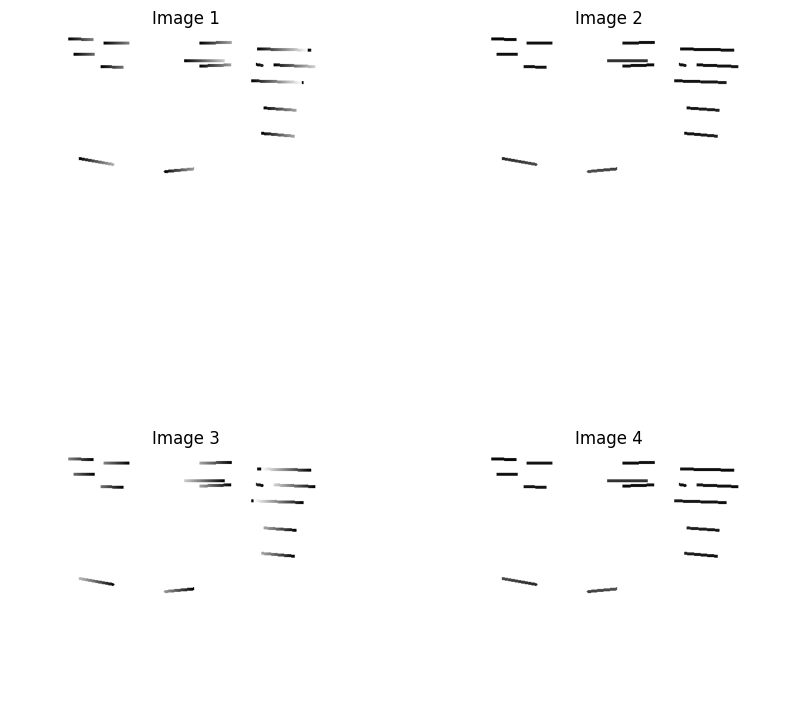

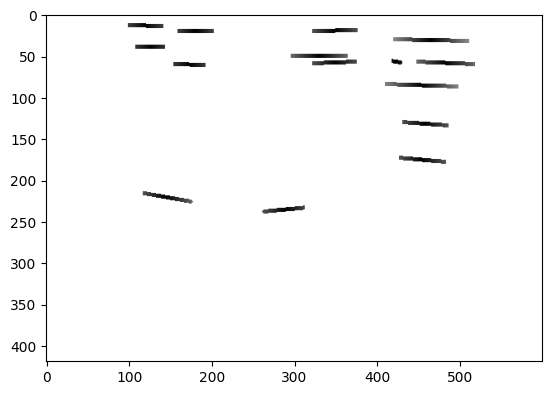

In [218]:
plt.imshow(get_image_maps(0)[1],cmap='gray')
plt.show()

In [163]:
image.shape[0]

419

In [33]:
tcl_map = np.zeros_like(image)

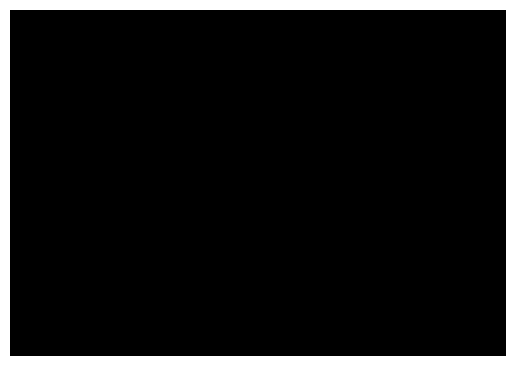

In [32]:
plt.imshow(tcl_map)
plt.axis('off')
plt.show()

In [97]:
def image_properties(image_number=0,word=True):
    image = cv2.imread(os.getcwd()+"/SynthText/"+imnames[image_number][0])
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    coordinates = wordbb[image_number] if word == True else charbb[image_number]
    print(coordinates.shape)
    distances = []
    for i in range(coordinates.shape[2]):
        # Extract the 4 points (x and y) of the bounding box for the i-th word
        x_coords = coordinates[0, :, i].astype('int') 
        y_coords = coordinates[1, :, i].astype('int') 
        print("Y is :", y_coords)
        print("X is :", x_coords)
        tco = get_tco(x_coords,y_coords)
        # tcl = get_tcl(x_coords,y_coords).astype('int')
        # print("TCO : ",tco)
        # Stack x and y coordinates into a (4, 2) array of points
        points = np.vstack((x_coords, y_coords)).T.astype(np.int32)  # Shape (4, 2)

        # Reshape the points to be compatible with polylines
        points = points.reshape((-1, 1, 2))  # Shape (4, 1, 2)

        # Draw the bounding box on the image
        # cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.line(image, (x_coords[0], y_coords[0]), (x_coords[1], y_coords[1]), color=(0, 255, 0), thickness=2)
        cv2.line(image, (x_coords[2], y_coords[2]), (x_coords[3], y_coords[3]), color=(0, 255, 0), thickness=2)
        # cv2.line(image, (tcl[0], tcl[1]), (tcl[2], tcl[3]), color=(0, 255, 0), thickness=2)

        if(i != (coordinates.shape[2]-1)):
            x_coords_next = coordinates[0,:,i+1].astype('int')
            y_coords_next = coordinates[1,:,i+1].astype('int')
            y_distance_up = np.abs(y_coords[1]-y_coords_next[0]) 
            y_distance_bottom = np.abs(y_coords[3]-y_coords_next[2])
            x_distance_up =  np.abs(x_coords[1]-x_coords_next[0]) 
            x_distance_bottom = np.abs(x_coords[3]-x_coords_next[2])
            # print("OVERALL MANNHATAN DISTANCE BETWEEN ",i," AND ",i+1," : ",np.sum([y_distance_up,y_distance_bottom,x_distance_up,x_distance_bottom]))
            if np.sum([y_distance_up,y_distance_bottom,x_distance_up,x_distance_bottom]) <= 50 :
                cv2.line(image, (x_coords[1], y_coords[1]), (x_coords_next[0], y_coords_next[0]), color=(0, 255, 0), thickness=2)
                cv2.line(image, (x_coords[3], y_coords[3]), (x_coords_next[2], y_coords_next[2]), color=(0, 255, 0), thickness=2)
            distances.append(np.sum([y_distance_up,y_distance_bottom,x_distance_up,x_distance_bottom]))
        cv2.circle(image, (int(tco[0]), int(tco[1])), radius=3, color=(255, 0, 0), thickness=-1)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()
    return distances

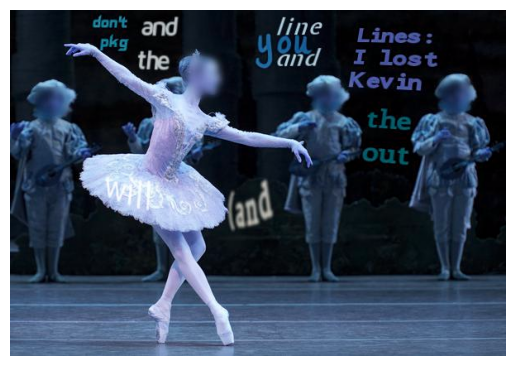

(2, 4, 15)
Y is : [21 23 41 39]
X is : [420 512 511 420]
Y is : [46 48 68 66]
X is : [418 431 428 415]
Y is : [47 50 70 67]
X is : [448 519 518 447]
Y is : [73 77 98 95]
X is : [410 499 499 409]
Y is : [197 208 245 233]
X is : [117 179 172 110]
Y is : [ 9  8 30 31]
X is : [322 377 378 322]
Y is : [48 46 68 70]
X is : [322 376 377 323]
Y is : [ 9  9 32 31]
X is : [159 203 203 158]
Y is : [49 50 73 72]
X is : [154 193 193 153]
Y is : [208 203 264 269]
X is : [260 313 319 266]
Y is : [118 122 147 143]
X is : [431 487 485 430]
Y is : [162 168 189 184]
X is : [427 484 482 425]
Y is : [29 29 72 71]
X is : [296 365 365 296]
Y is : [ 5  6 22 22]
X is : [ 99 142 142  99]
Y is : [28 29 50 50]
X is : [108 144 144 108]


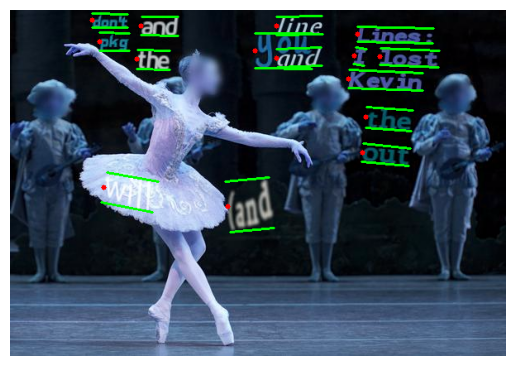

In [102]:
distances = image_properties(0,True)

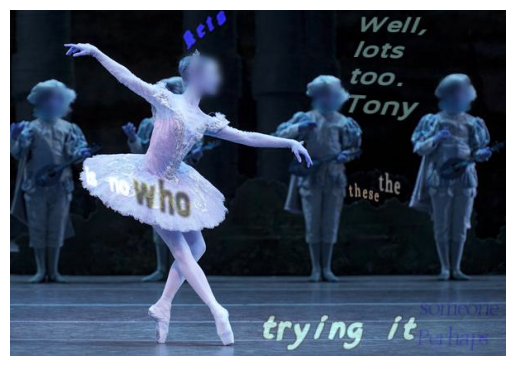

(2, 4, 58)
Y is : [205 212 244 235]
X is : [148 176 178 151]
Y is : [203 207 250 245]
X is : [179 196 198 181]
Y is : [217 222 254 249]
X is : [198 217 219 199]
Y is : [29 20 41 50]
X is : [208 220 226 213]
Y is : [21 14 29 36]
X is : [224 234 239 228]
Y is : [11  5 24 30]
X is : [234 243 249 240]
Y is : [ 6 -1 14 22]
X is : [247 258 263 251]
Y is : [199 201 221 220]
X is : [445 452 451 445]
Y is : [197 199 222 221]
X is : [453 463 463 453]
Y is : [207 208 225 224]
X is : [464 471 471 464]
Y is : [369 369 399 399]
X is : [306 324 322 304]
Y is : [375 376 400 400]
X is : [322 342 340 321]
Y is : [379 379 412 412]
X is : [336 363 361 334]
Y is : [368 369 399 399]
X is : [369 386 383 366]
Y is : [376 376 399 399]
X is : [385 406 405 383]
Y is : [377 377 411 411]
X is : [403 429 427 401]
Y is : [369 369 400 400]
X is : [458 475 472 456]
Y is : [371 371 400 400]
X is : [477 493 490 474]
Y is : [ 9  9 28 27]
X is : [425 459 456 422]
Y is : [13 14 28 27]
X is : [457 475 473 455]
Y is : [ 8  8

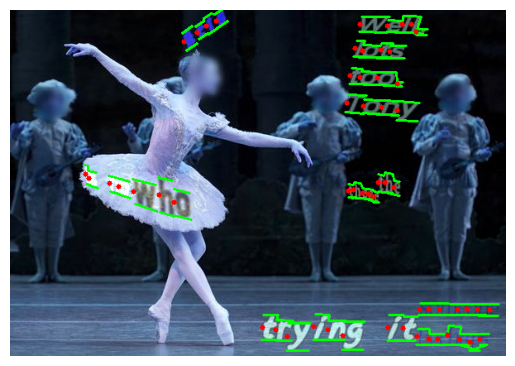

In [103]:
distances = image_properties(100,False)

In [95]:
distances = np.array(distances)

NameError: name 'distances' is not defined

In [96]:
np.min(distances)

NameError: name 'distances' is not defined

In [17]:
len(distances)

43

(array([36.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([  16. ,  148.6,  281.2,  413.8,  546.4,  679. ,  811.6,  944.2,
        1076.8, 1209.4, 1342. ]),
 <BarContainer object of 10 artists>)

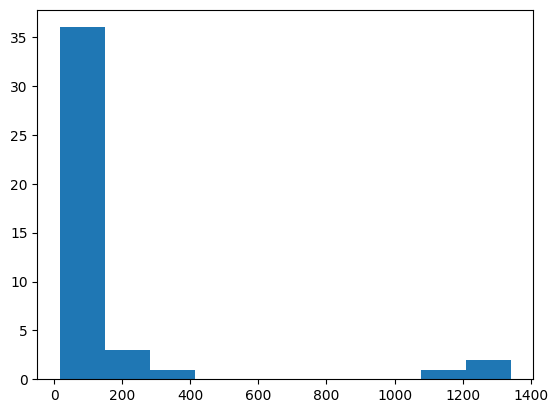

In [18]:
plt.hist(distances)